# Prepocessing - Categorical Data

# Import

In [105]:
import  numpy as np
import cv2
from matplotlib import pyplot as plt
from scipy import ndimage


# Sommaire

[I. Loading and saving images](#Partie1)

[II. Resizing, cropping, rotating, zooming, extracting part of images](#Partie2)
- [I.1. Resizing](#Partie1.1) 
- [I.2. Cropping](#Partie1.2) 
- [I.2. Rotating](#Partie1.3) 
- [I.2. Zooming](#Partie1.4) 
- [I.2. Exctrating](#Partie1.5) 

[III. Blurring, sharpening, enhancing contrast, Denoising](#Partie3)
- [III.1. Blurring](#Partie3.1) 
- [III.2. Sharpening](#Partie3.2) 
- [III.3. Enhancing contrast](#Partie3.3) 
- [III.4. Denoising](#Partie3.4) 

[IV. Isolating colors and binarizing images](#Partie4)
- [IV.1. Isolating colors](#Partie4.1) 
- [IV.2. Binarizing images](#Partie4.2) 

[V. Removing background](#Partie5)

[VI. Detecting edges and corners](#Partie6)
- [VI.1. Detecting edges](#Partie6.1) 
- [VI.2. Detecting corners](#Partie6.2)
- [VI.3. Method Hough Transform](#Partie6.3)

[VII. Creating features: pixels, mean colors, colors histograms](#Partie7)
- [VII.1. Features with pixels](#Partie7.1) 
- [VII.2. Features with mean colors](#Partie7.2)
- [VII.3. Features with colors histograms](#Partie7.3) 


## I. Loading and saving images<a class="anchor" id="Partie1"></a>

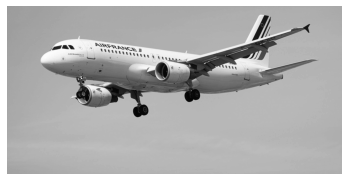

In [106]:
image_gray=cv2.imread("images/plane.jpg",cv2.IMREAD_GRAYSCALE) #Charge l'image en nuance de gris
plt.imshow(image_gray,cmap='gray')
plt.axis("off")
plt.show()

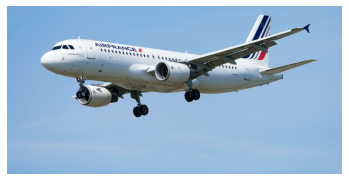

In [107]:
image_color=cv2.imread("images/plane.jpg",cv2.IMREAD_COLOR) #Charge l'image en couleur BGR
image_color=cv2.cvtColor(image_color,cv2.COLOR_BGR2RGB) #Converti en RGB
plt.imshow(image_color)
plt.axis("off")
plt.show()

Les images sont des données composées de pixel. On peut transformer l'image en matrice où chaque élément
correspond à un seul pixel.

In [108]:
# Montre les dimensions de l'image

print("gris - Dimensions: ",image_gray.shape)
print("gris - Pixel en haut à gauche: ",image_gray[0,0])
print("couleur - Dimensions: ",image_color.shape)
print("couleur - Pixel en haut à gauche: ",image_color[0,0])

gris - Dimensions:  (1000, 2000)
gris - Pixel en haut à gauche:  155
couleur - Dimensions:  (1000, 2000, 3)
couleur - Pixel en haut à gauche:  [113 165 212]


In [109]:
# Enregistre l'image en nuance de gris

cv2.imwrite("images/plane_gray.jpg",image_gray)

True

## II. Resizing, cropping, rotating, zooming, extracting part of images<a class="anchor" id="Partie2"></a>

### Resizing<a class="anchor" id="Partie2.1"></a>

Le resizing est important pour le traitement d'image car:
- les images viennent de toutes les formes et tailles et elles doivent avoir les même dimensions pour être utilisées. Il faut faire attention que cette standardisation fait nécessairement perdre de l'information car on retire des pixels.
- Etant donnée l'entrainement d'un modèle de ML pouvant nécessiter plusieurs centaine de millier il est necessaire parfois de réduire la taille des images

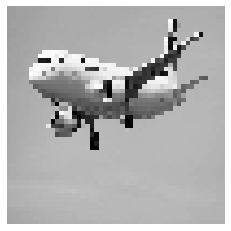

In [110]:
# Reforme l'image en 50x50

image_gray_50x50=cv2.resize(image_gray,(50,50))
plt.imshow(image_gray_50x50,cmap='gray')
plt.axis("off")
plt.show()

### Cropping<a class="anchor" id="Partie2.2"></a>

Recadrer l'image en selectionnant des lignes et colonnes spécifiques est utile pour garder un élement précis de l'image (exemple si on utilise l'image fixe d'une caméra)

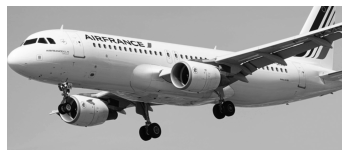

In [111]:
image_gray_cropped=image_gray[100:700,200:1600]
plt.imshow(image_gray_cropped,cmap='gray')
plt.axis("off")
plt.show()

### Rotating<a class="anchor" id="Partie2.3"></a>

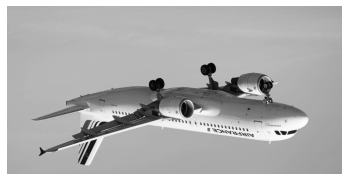

In [112]:
image_rotated = cv2.rotate(image_gray, cv2.cv2.ROTATE_180)
plt.imshow(image_rotated,cmap='gray')
plt.axis("off")
plt.show()

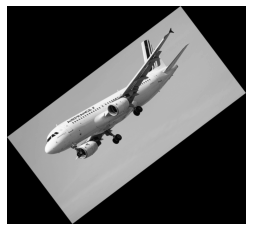

In [113]:
image_rotated = ndimage.rotate(image_gray, 37) #rotation angle in degree
plt.imshow(image_rotated,cmap='gray')
plt.axis("off")
plt.show()

### Zooming<a class="anchor" id="Partie2.4"></a>

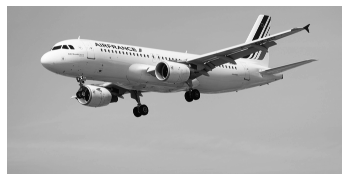

In [114]:
image_zoomed = cv2.resize(image_gray, (0,0), fx=3.0, fy=3.0,interpolation=cv2.INTER_AREA)
plt.imshow(image_zoomed,cmap='gray')
plt.axis("off")
plt.show()

### Extracting<a class="anchor" id="Partie2.5"></a>

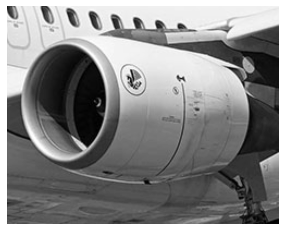

In [115]:
image_gray_cropped=image_gray[300:500,870:1120]
image_zoomed_cropped = cv2.resize(image_gray_cropped, (0,0), fx=3.0, fy=3.0,interpolation=cv2.INTER_AREA)
plt.imshow(image_zoomed_cropped,cmap='gray')
plt.axis("off")
plt.show()

## III. Blurring, sharpening, enhancing contrast<a class="anchor" id="Partie3"></a>

### Blurring (filtre moyenne)<a class="anchor" id="Partie3.1"></a>

On veut adoucir (brouiller/blur) l'image en remplacant chaque piel par la moyenne des pixels qui l'entourent. L'opération mathématique se fait à l'aide d'un kernel (filtre de taille NxN). La taille de ce kernel détermine le niveau d'adoucissement obtenu (on prend en compte plus de pixel dans la moyenne autour du pixel à remplacer). 

Le principe ici est de multiplier chaque élément du kernel avec un pixel de l'image et d'en faire la somme pour obtenir la valeur du pixel au milieu du kernel. (On vient passer le kernel sur toutes l'images pour recalculer tous les pixels de l'image, les seuls pixels retirer sont ceux sur les bords selon la taille du kernel)


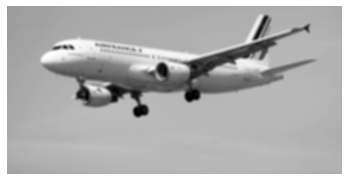

In [116]:
image_gray_blurred=cv2.blur(image_gray,(20,20))
plt.imshow(image_gray_blurred,cmap='gray')
plt.axis("off")
plt.xticks([])
plt.yticks([])
plt.show()

### Sharpening<a class="anchor" id="Partie3.2"></a>

Dans l'aiguisage/affutage de l'image le but ici est de mettre en valeur les pixels notamment pour mettre en valeur des textures (notamment les frontières) ou un objet sur un fond uniforme. Comme l'adoucissement on vient utiliser un kernel (filtre) qui va augmenter la valeurs du pixel au centre par rapport à ses voisins.

In [117]:
kernel=np.array([[0,-1,0],
                [-1,5,-1],
                [0,-1,0]])

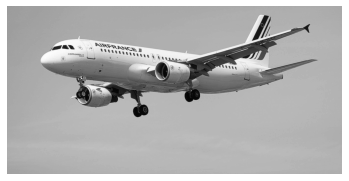

In [118]:
image_gray_sharp=cv2.filter2D(image_gray,-1,kernel)
plt.imshow(image_gray_sharp,cmap='gray')
plt.axis("off")
plt.show()

### Enhancing contrast<a class="anchor" id="Partie3.3"></a>

Ici on veut augmenter le contraste entre les pixels dans l'image.
- Une première méthode est d'utiliser l'image en nuance de gris directement 
- Une 2ème méthode est d'utiliser l'image en couleur mais on doit d'abord la convertir en format YUV (Brightness et UV correspondent aux couleurs)

L'égalisation des histogrammes permet à l'image d'utiliser une range d'intensité de pixel plus importante. Augmenter le contraste peut souvent permettre de rendre l'objet à étudier plus distinct de son entourage.

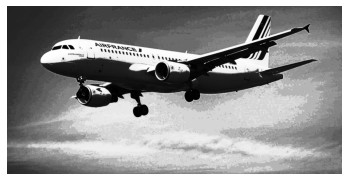

In [119]:
image_enhanced=cv2.equalizeHist(image_gray)
plt.imshow(image_enhanced,cmap='gray')
plt.axis("off")
plt.show()

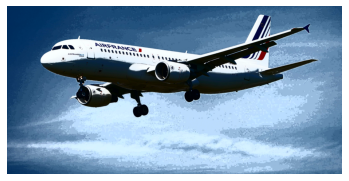

In [120]:
image_yuv=cv2.cvtColor(image_color,cv2.COLOR_RGB2YUV) # convertit de RGB à YUV
image_yuv[:,:,0]=cv2.equalizeHist(image_yuv[:,:,0])
image_rgb_enhanced=cv2.cvtColor(image_yuv,cv2.COLOR_YUV2RGB) 
cv2.imwrite("images/plane_color_enhanced.jpg",image_rgb_enhanced)
plt.imshow(image_rgb_enhanced,cmap='gray')
plt.axis("off")
plt.show()

### Denoising<a class="anchor" id="Partie3.4"></a>

Le filtre **médian** de dimension mxn remplace chaque pixel de l’image par la valeur
médiane du voisinage mxn centré sur ce même pixel.

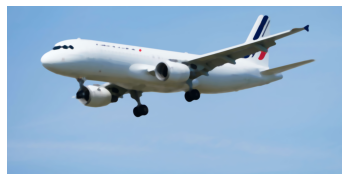

In [121]:
image_median = cv2.medianBlur(image_color, 19)
plt.imshow(image_median)
plt.axis("off")
plt.show()

## IV. Isolating colors and binarizing images<a class="anchor" id="Partie4"></a>

### Isolating colors<a class="anchor" id="Partie4.1"></a>

On veut ici isoler les couleurs dans une image. Cela est direct:
- Tout d'abord on convertit en HSV (hue, saturation,value).
- On définit ensuite le nombre de couleur que l'on veut isoler
- On crée ensuite un masque pour l'image (où on ne garde que le blanc)

Cela fonctionne très bien quand l'objet à distinguer est d'une couleur assez différente de son entourage (on règle donc le masque afin de ressortir au mieux l'objet en question)

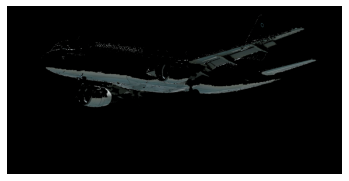

In [122]:
image_color=cv2.imread("images/plane.jpg",cv2.IMREAD_COLOR) #Charge l'image en couleur BGR
image_hsv=cv2.cvtColor(image_color,cv2.COLOR_RGB2HSV) #conversion en HSV

lower_mask = image_hsv [:,:,0] > 50
upper_mask = image_hsv [:,:,0] < 103
mask = upper_mask*lower_mask


red = image_color[:,:,0]*mask
green = image_color[:,:,1]*mask
blue = image_color[:,:,2]*mask

image_color_masked = np.dstack((red,green,blue))
plt.imshow(image_color_masked)
plt.axis("off")
plt.show()

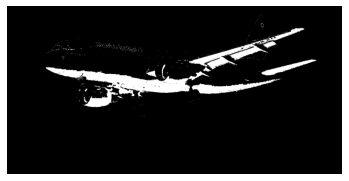

In [123]:
plt.imshow(mask,cmap='gray')
plt.axis("off")
plt.show()

### Binarizing images<a class="anchor" id="Partie4.2"></a>

La binarisation d'une image permet d'en avoir une version plus simple. La solution ici est de seuiller la valeur des pixels de sorte à ce qu'un pixel en dessous de la valeur de seuil soit blanc et au-dessus soit noir. Ce processus est intéressant notamment quand la luminosité est différente dans certaine région de l'image.
Le bénéfice de binariser une image est de débruiter l'image.

La solution utilisée adaptiveThreshold ici a 4 paramètres importants: 
- max_output_value: qui détermine l'intensité maximum à donner à un pixel au-dessus du seuil
- cv2.ADAPTIVE_THRESH_GAUSSIAN_C: le seuil d'un pixel est défini en fonction de la somme pondérée des pixels voisins. Ces poids sont déterminés par une gaussienne. On peut changer cette méthode pour que le seuil d'un pixel soit par exemple la moyenne des pixels autour ADAPTIVE_THRESH_MEAN_C
- neighbordhood_size: correspond à la taille du voisinage du pixel pour trouver le seuil

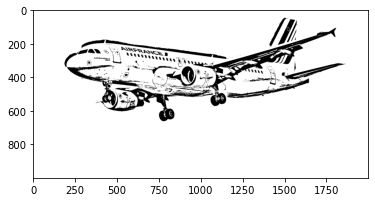

In [124]:
max_output_value=255
neighbordhood_size=99
substract_from_mean=10
image_binarized=cv2.adaptiveThreshold(image_gray,
                                    max_output_value,
                                    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
                                    cv2.THRESH_BINARY,
                                    neighbordhood_size,
                                    substract_from_mean)

plt.imshow(image_binarized,cmap='gray')

plt.show()

## V. Removing background<a class="anchor" id="Partie5"></a>

Tout d'abord il faut comprendre qu'il va être compliqué de totalement isoler l'image (à moins d'avoir une capacité de calcul élevée pour augmenter le nombre d'itération). Cela dépend aussi beaucoup de l'initialisation de la position et de la taille de la zone à restreindre.

Dans notre solution ici on initie une zone dont il faut retirer le background avec un rectangle. Toutes les valeurs en dehors du rectangle seront considérer comme de l'arrière plan. L'algorithme évalue ensuite les pixels à l'intérierur du rectangle pour savoir ce qui est background ou pas.

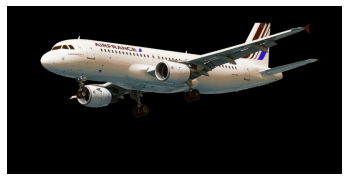

In [125]:
rectangle=(0,100,2000,600) 
mask=np.zeros(image_color.shape[:2],np.uint8) # initie un mask
bgdmodel=np.zeros((1,65),np.float64)
fgdmodel=np.zeros((1,65),np.float64)

cv2.grabCut(image_color, #image
            mask, #masque qui va être mis à jour
            rectangle, #zone de calcul
            bgdmodel, #vecteur initial de background
            fgdmodel, #vecteur initial de background
            15, #nombre d'itération
            cv2.GC_INIT_WITH_RECT) #initialisation avec le rectangle

# on recrée un masque complet qui ne sera pas seulement borné au rectangle, le background identifié est mis à 0 sinon 1
mask_2=np.where((mask==2)|(mask==0),0,1).astype('uint8')

# on multiplie l'image par le masque pour avoir les valeurs de background identifié à 0
image_color_nbog=image_color*mask_2[:,:,np.newaxis]

plt.imshow(image_color_nbog)
plt.axis("off")
plt.show()

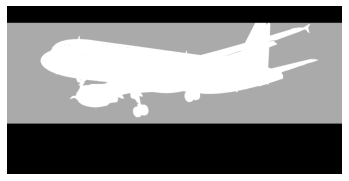

In [126]:
plt.imshow(mask,cmap='gray')
plt.axis("off")
plt.show()

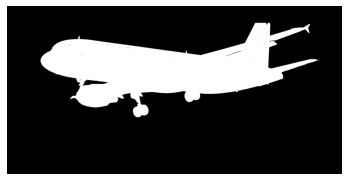

In [127]:
plt.imshow(mask_2,cmap='gray')
plt.axis("off")
plt.show()

## VI. Detecting edges and corners<a class="anchor" id="Partie6"></a>

### Edges<a class="anchor" id="Partie6.1"></a>

Les frontières sont des portions importantes d'information en ML. Trouver les frontières permets de retirer des zones qui n'ont pas d'intérèt d'un pdv information. Il y a plusieur type de solution: sobel filters, laplacian edge, etc). 

La solution ici est le canny detector qui dépend de 2 paramètres qui sont le lower et upper seuil on utilise ici 2/3 et 4/3 du pixel median mais un eilleur ajustement peut donner de meilleur résultat

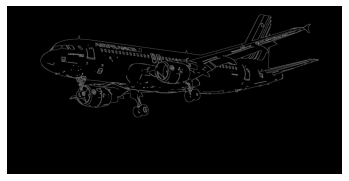

In [128]:
median_intensity=np.median(image_gray) #calcul l'intensité médiane

# On configure les seuils pour être au-dessus/dessous de 1/3 de l'intensité médiane
lower_threshold=int(max(0,(1-0.33)*median_intensity))
upper_threshold=int(min(255,(1+0.33)*median_intensity))

# On applique le canny edge detector
image_canny=cv2.Canny(image_gray,lower_threshold,upper_threshold)

plt.imshow(image_canny,cmap='gray')
plt.axis("off")
plt.show()

### Corners<a class="anchor" id="Partie6.2"></a>

La méthode harris est adaptée pour detecter les intersections de 2 frontières. L'intérèt de cette détection des coins est comme pour les frontières car les coins tiennent énornément d'information.
- block_size: est la taille du voisinage autour de chaque pixel
- aperture: est la taille du sobel kernel utilisé
- free_parameter: veut dire que les valeurs grandes correspondent à des coins souples

On applique ensuite le seuil pour ne garder que les coins les plus intéressant.
On peut utiliser la méthode goodfeaturestotrack pour identifier un nombre spécifique de coin.

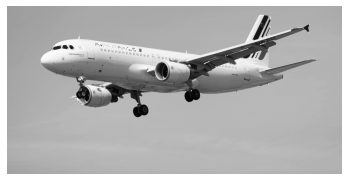

In [129]:
image_gray=np.float32(image_gray)

#on configue les paramètres des bords
block_size=2
aperture=29
free_parameter=0.04

detector_responses=cv2.cornerHarris(image_gray,
                                    block_size,
                                    aperture,
                                    free_parameter)

detector_responses=cv2.dilate(detector_responses,None)

#on garde seulement les solutions supérieures au seuil marqué comme blanc
threshold=0.02
image_gray[detector_responses>threshold*detector_responses.max()]=255
plt.imshow(image_gray,cmap='gray')
plt.axis("off")
plt.show()

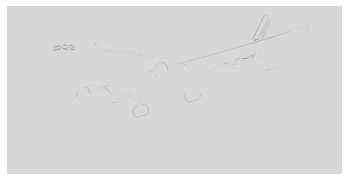

In [130]:
plt.imshow(detector_responses,cmap='gray')
plt.axis("off")
plt.show()

### Method Hough Transform<a class="anchor" id="Partie6.3"></a>

#### Détéction de ligne avec HoughLinesP

Dans OpenCV, la détection des lignes à l'aide de la transformée de Hough est implémentée dans la fonction HoughLines et HoughLinesP [Probabilistic Hough Transform]. Cette fonction prend les arguments suivants :
cv.HoughLinesP(edges, lines, rho, theta, threshold, minLineLength, maxLineGap)

- edges : Sortie du détecteur de bords.
- lignes : Un vecteur pour stocker les coordonnées du début et de la fin de la ligne.
- rho : Le paramètre de résolution rho en pixels.
- theta : La résolution du paramètre theta en radians.
- threshold : Le nombre minimum de points d'intersection pour détecter une ligne.
- minLineLength: longueur minimale de la ligne pour être prise en compte.
- maxLineGap: écart maximal autorisé entre les points d'une même ligne pour les relier. 

Il y a 2 étapes aux processus:
- Détecter les contours dans l'image (on utilise la méthode canny de OpenCV ici)
- Appliquer la transformée de Hough

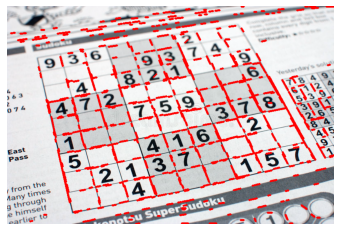

In [131]:
img = cv2.imread('images/sudoku.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 10
maxLineGap = 6
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap) 
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

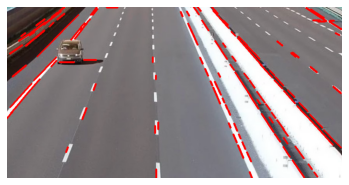

In [132]:
img = cv2.imread('images/autoroute.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,70,minLineLength,maxLineGap) 
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

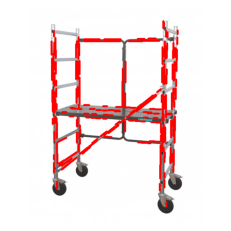

In [133]:
img = cv2.imread('images/echaffaudage.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

minLineLength = 1000
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,60,minLineLength,maxLineGap) 
for line in lines:
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (255, 0, 0), 3)

plt.imshow(img,cmap='gray')
plt.axis("off")
plt.show()

On peut voir que sur ces images comportant énormément de droites rectilignes la méthode Hough Lines Transform est très efficace très rapidement pour identifier les lignes principales automatiquement sans trop de pré-traitement sur des images brutes acquises sur internet. On pourrait probablement encore améliorer ces résultats de 2 manières:

- Améliorer le pré-traitement de l'image notamment avec des effets sur les constrastes, en la binarizant pour faire ressortir les différentes zones et mieux faire ressortir les bordures lors de la phase de détéction des lignes, bref effectuer un fine-tunning de la phase de détéction des lignes.
- Réaliser un fine-tunning avec les paramètres de HoughLinesP: threshold, minLineLength, maxLineGap

#### Détéction de cercle avec HoughCirclesP

cv.HoughCircles (image, circles, method, dp, minDist, param1 = 100, param2 = 100, minRadius = 0, maxRadius = 0)

- image: image en nuance de gris
- circles: vecteur de sortie avec paramètre des cercles
- method: méthde de détection utilisée: ici Hough gradient
- dp: rapport inverse de la résolution de l'accumulateur à la résolution de l'image.
- minDist: distance minimale entre les centres des cercles détectés. Si le paramètre est trop petit, plusieurs cercles voisins peuvent être faussement détectés en plus d'un vrai. S'il est trop grand, certains cercles peuvent être manqués.
- param1: premier paramètre spécifique à la méthode.
- param2: deuxième paramètre spécifique à la méthode
- minRadius: rayon minimal du cercle.
- maxRadius: rayon maximal du cercle.

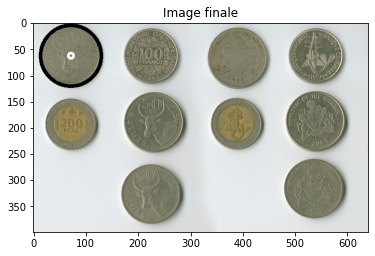

In [134]:
img = cv2.imread('images/monnaies.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows = gray.shape[0]
edges = cv2.Canny(gray,240,255,apertureSize = 3)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist=1000, param1=15, param2=10, minRadius=20, maxRadius=100) # detection des cercles

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
         # circle center
        cv2.circle(img, center, 5, (255, 255, 255), 3)
         # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (0, 0, 0), 5)

    plt.imshow(img,cmap="gray")
    plt.title('Image finale')
    plt.show()

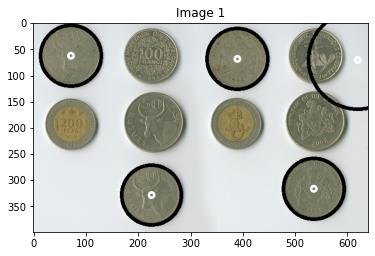

In [135]:
img = cv2.imread('images/monnaies.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows = gray.shape[0]
edges = cv2.Canny(gray,240,255,apertureSize = 3)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist=200, param1=15, param2=10, minRadius=20, maxRadius=100) # detection des cercles

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
         # circle center
        cv2.circle(img, center, 5, (255, 255, 255), 3)
         # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (0, 0, 0), 5)

    plt.imshow(img,cmap="gray")
    plt.title('Image 1')
    plt.show()

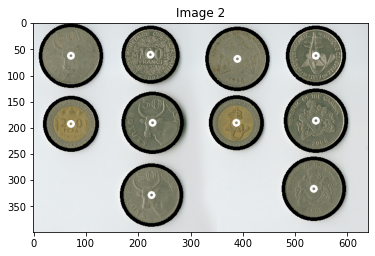

In [136]:
img = cv2.imread('images/monnaies.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
rows = gray.shape[0]
edges = cv2.Canny(gray,240,255,apertureSize = 3)
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, 1, minDist=110, param1=15, param2=10, minRadius=20, maxRadius=100) # detection des cercles

if circles is not None:
    circles = np.uint16(np.around(circles))
    for i in circles[0, :]:
        center = (i[0], i[1])
         # circle center
        cv2.circle(img, center, 5, (255, 255, 255), 3)
         # circle outline
        radius = i[2]
        cv2.circle(img, center, radius, (0, 0, 0), 5)

    plt.imshow(img,cmap="gray")
    plt.title('Image 2')
    plt.show()

On voit ici que la transformée de Hough couplée avec la détection des bordures est extrêmement performante pour reconnaître toutes les pièces. Il n'a suffit qu'un peu de fine tunning pour réussir à correctement identifier les 10 pièces des paramètres: minRadius, maxRadius et minDist comme on le voit en partant d'une liste de paramètre obtenus par défaut sur un site avec les 3 tests consécutifs. 

## VII. Creating features: pixels, mean colors, colors histograms<a class="anchor" id="Partie7"></a>

### Features with pixels<a class="anchor" id="Partie7.1"></a>

Ici on veut convertir une image en observation pour du ML. Cette conversion se fait en convertissante le format NxN (pour nuance de gris) et NxNx3 (en RGB) en vecteur ligne qui sera de longueur N*N ou 3*N*N.

Le problème majeur ici est que même une petite image peut avoir peut avoir des idzaines voir centaine de millier de features. Il y aura donc tout un travail de reduction de dimension à effectuer.

In [137]:
image_gray_resize=cv2.resize(image_gray,(10,10)) #on réduit l'image
image_gray_resize.flatten() #on transforme la matrice en vecteur ligne

array([159.  , 163.5 , 168.5 , 169.  , 169.  , 170.  , 172.  , 174.  ,
       175.  , 172.  , 161.  , 167.  , 169.5 , 172.  , 171.75, 175.  ,
       175.  ,  22.  ,  59.25, 175.5 , 162.  ,  32.75, 255.  , 140.25,
       173.5 , 175.  , 176.25,  65.25, 180.  , 180.  , 165.5 , 123.  ,
       121.  , 143.5 ,  65.75,  16.25, 236.5 , 220.75,  99.  , 178.  ,
       169.  , 174.  , 178.  ,  91.  ,  91.25,  56.5 , 111.5 ,  99.5 ,
       182.  , 182.5 , 170.  , 177.  ,  54.  , 168.  , 182.5 ,   7.5 ,
       182.  , 183.  , 184.  , 181.  , 170.75, 180.  , 183.75, 184.5 ,
       185.25, 183.  , 183.  , 183.  , 183.  , 178.5 , 175.  , 180.  ,
       183.  , 183.  , 184.  , 184.  , 182.  , 181.  , 181.  , 175.  ,
       176.  , 182.  , 189.  , 188.  , 183.  , 180.  , 183.  , 185.  ,
       182.5 , 178.  , 167.5 , 175.  , 178.5 , 182.  , 182.  , 182.  ,
       182.  , 182.  , 180.  , 176.75], dtype=float32)

### Features with mean colors<a class="anchor" id="Partie7.2"></a>

La sortie ici est un vecteur ligne de taille 3 donnant la couleur moyenne par channel. Cette features peut être utilisée comme n'importe quelle feature en ML

In [138]:
channels=cv2.mean(image_color)
observations=np.array([(channels[0],channels[1],channels[2])])
observations

array([[204.217795 , 174.1930715, 142.2123865]])

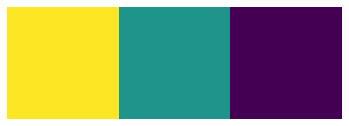

In [139]:
plt.imshow(observations)
plt.axis("off")
plt.show()

### Features with colors histograms<a class="anchor" id="Partie7.3"></a>

Un histogramme représente la distribution des valeurs dans les pixels (on aura donc une étendu de valeur de 256 et un effectif, ie nombre de pixel sur chaque valeur pour chaque image), on pourra alors utiliser cette distribution comme feature.

(0.0, 256.0)

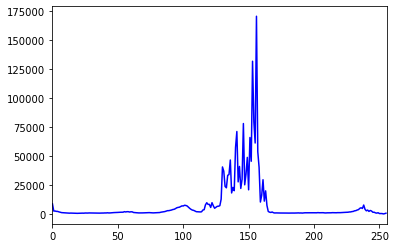

In [140]:
features=[] #liste de features
colors=('r','g','b')
for i, channel in enumerate(colors):
    histogram=cv2.calcHist([image_color], #image
                            [i], #index du channel
                            None, #pas de masque
                            [256], #taile de histogram
                            [0,256]) #etendu de l'histogram
    features.extend(histogram)

observation=np.array(features).flatten()
plt.plot(histogram,color=channel)
plt.xlim([0,256])